In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv("/content/drive/MyDrive/Aiffel_data/Flipped/titanic/train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight') # matplot 스타일시트 설정
import warnings
warnings.filterwarnings('ignore') # 
%matplotlib inline

In [6]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [7]:
type(data)

pandas.core.frame.DataFrame

In [8]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
data.isnull().sum(axis=0) # row 별로 합 (True =1, False =0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data.isnull().sum(axis=1) # column 별로 합  # pandas document 확인할것

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64

* How many Survived?

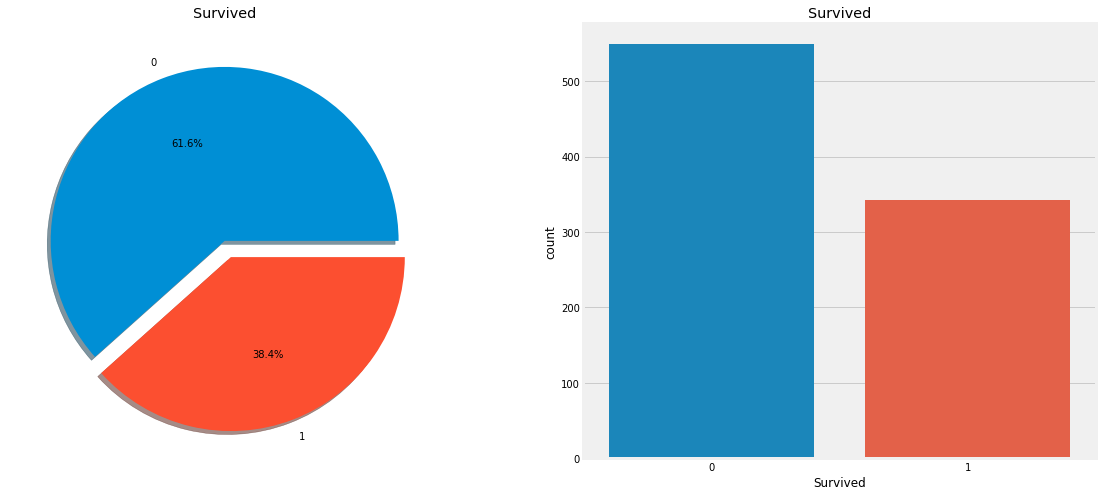

In [11]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

In [12]:
type(data['Survived']) # Series 

pandas.core.series.Series

In [13]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

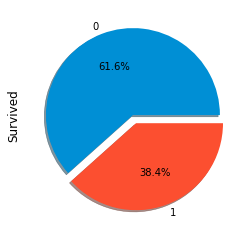

In [14]:
data['Survived'].value_counts().plot.pie(explode = [ 0, 0.1],autopct='%1.1f%%', shadow=True)

In [15]:
data['Survived'].unique()

array([0, 1])

# Analysing The Features

* Sex-> Categorical Feature

In [16]:
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [17]:
data.groupby(['Survived','Sex'])['Sex'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64

In [18]:
data.groupby(['Sex','Survived'], axis=0).count()

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [19]:
#data.groupby(['Sex','Survived'], axis=1).count()

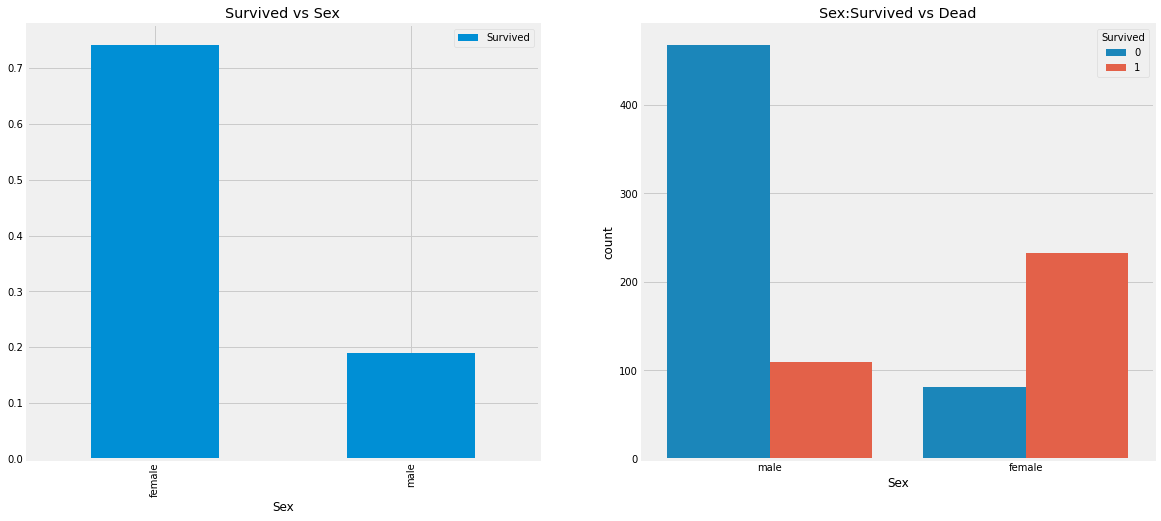

In [20]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax= ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

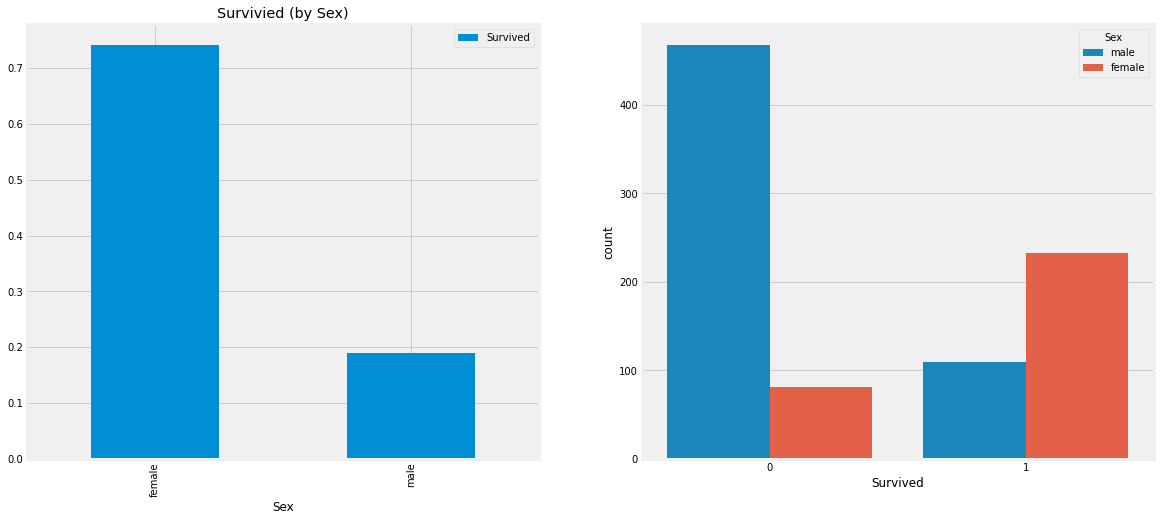

In [21]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survivied (by Sex)')
sns.countplot('Survived', hue='Sex', data= data, ax= ax[1])

In [22]:
data[['Sex', 'Survived']].groupby(['Sex'])

In [23]:
data[['Sex', 'Survived']].groupby(['Sex']).sum()

,Survived
Sex,
female,233
male,109


In [24]:
data[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [25]:
type(data[['Sex', 'Survived']].groupby(['Sex']).mean())

pandas.core.frame.DataFrame

In [26]:
 data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])

* Pclass -> Ordinal Feature

In [27]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [28]:
##crosstab
pd.crosstab(data.Pclass, data.Survived, margins=True)

# margins= True : 총합계 

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [29]:
## background_gradient(cmap=' ')
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='PuBu')




Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


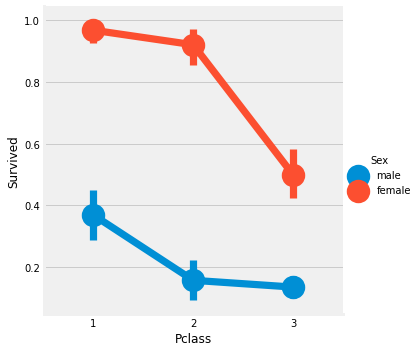

In [30]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data = data)
plt.show()

# factorplot-> catplot

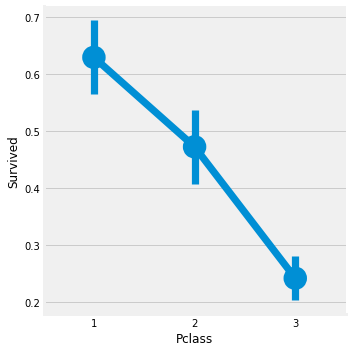

In [31]:
sns.factorplot('Pclass', 'Survived', data = data)
plt.show()

* Age-> Continous Feature

In [32]:
print('Oldest Passenger was of :', data['Age'].max(), 'Years')
print('Youngest Passanger was of :', data['Age'].min(), 'Years')
print('Average Age on the ship: ', data['Age'].mean(), 'Years')

Oldest Passenger was of : 80.0 Years
Youngest Passanger was of : 0.42 Years
Average Age on the ship:  29.69911764705882 Years


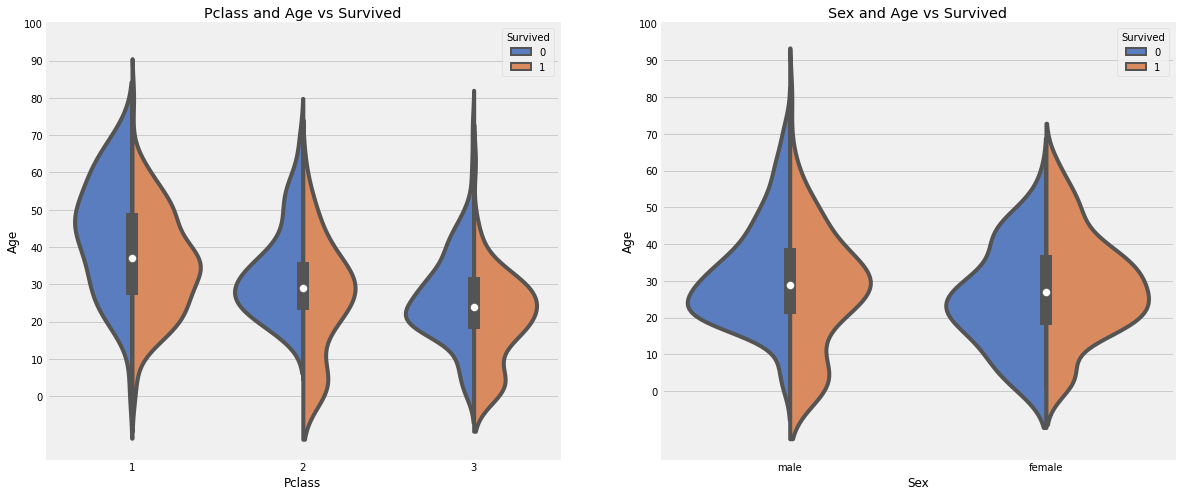

In [33]:
f, ax = plt.subplots(1,2, figsize=(18,8))

sns.violinplot("Pclass","Age", hue="Survived", data=data, split=True, palette="muted", ax= ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex", "Age", hue="Survived", data = data, split=True, palette="muted", ax= ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))
plt.show()

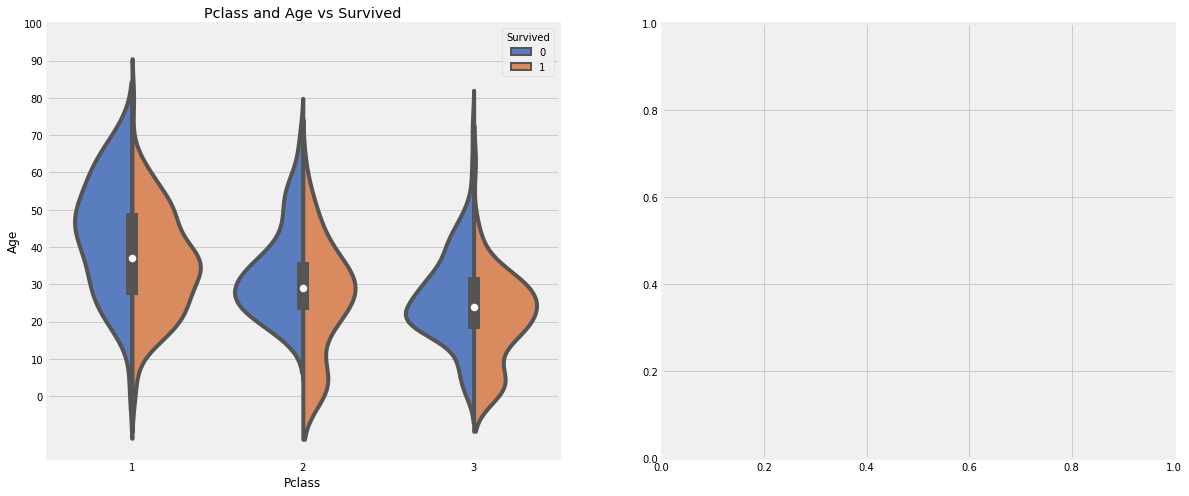

In [34]:
## 그림 하나만 그리기 

f, ax = plt.subplots(1,2, figsize=(18,8))

sns.violinplot("Pclass","Age", hue="Survived", data=data, split=True, palette="muted", ax= ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))


In [35]:
data['Initial'] = 0
for i in data:
  data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [36]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [37]:
# replace misspeled initials with Miss 

data['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace = True)

In [38]:
mean= data.groupby('Initial')['Age'].mean()

max= data.groupby('Initial')['Age'].max()

min= data.groupby('Initial')['Age'].min()

print(mean)
# print('\n')
# print(max)
# print('\n')
# print(min)

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64


> Filling NaN Ages

In [39]:
## Assiging the NaN Values with the 'Ceil values'(=roundup) of the mean ages 

data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']= 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']= 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']= 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']= 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']= 46

In [40]:
# no null values left finally

data.Age.isnull()

data.Age.isnull().any()


#any() : 하나라도 True인게 있으면 True
#all() : 모두 True여야 True 반환

False

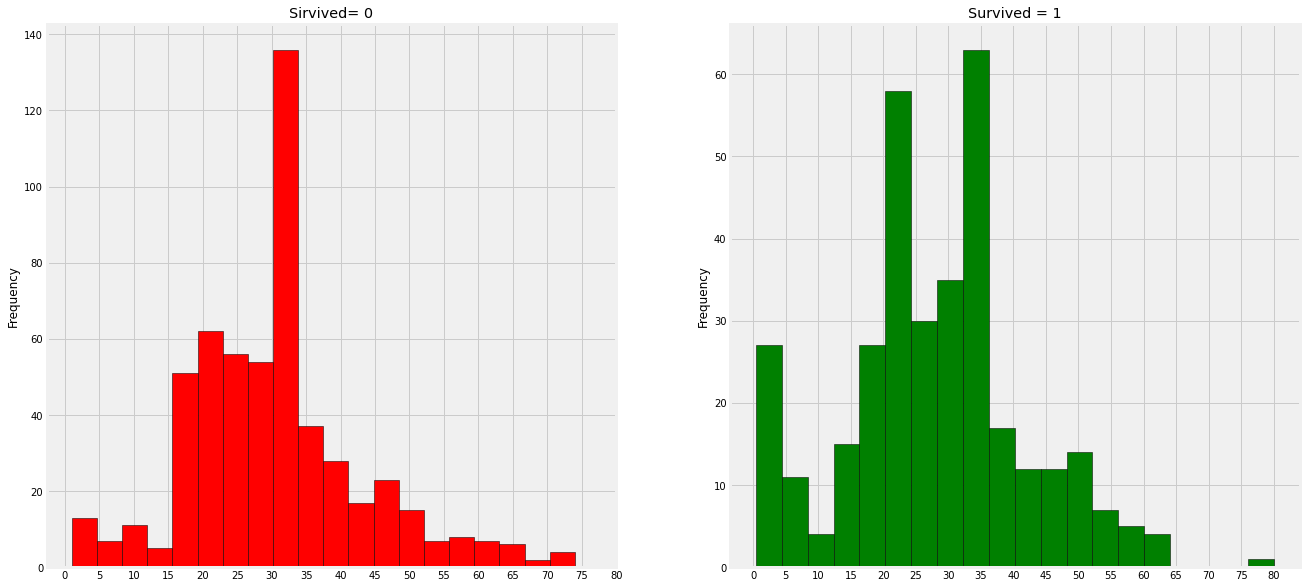

In [41]:
f,ax = plt.subplots(1,2, figsize=(20, 10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins= 20, edgecolor='black', color='red')
ax[0].set_title('Sirvived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], bins= 20, edgecolor='black', color='green')
ax[1].set_title('Survived = 1')
x2= list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show()

> observations

* 1)The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

* 2)The oldest Passenger was saved(80 years).

* 3)Maximum number of deaths were in the age group of 30-40.

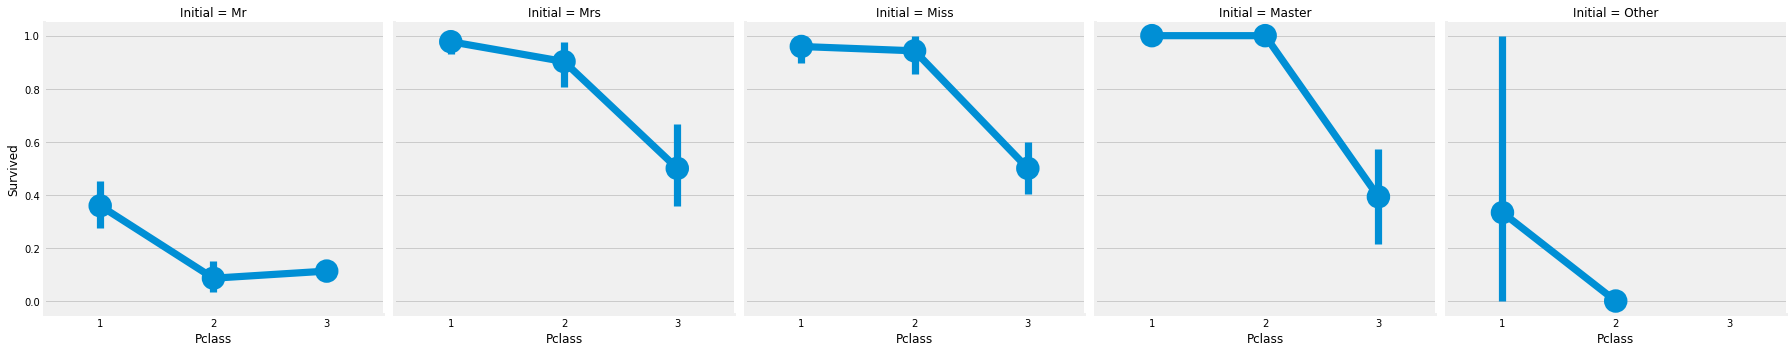

In [42]:
sns.factorplot('Pclass','Survived', col='Initial', data=data)
plt.show()

>Embarked->Categorical Value

In [43]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex,data.Survived], margins=True).style.background_gradient(cmap='summer_r')

* Chances for Survival by Port Of Embarkation

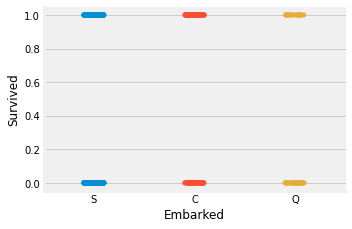

In [44]:
sns.catplot('Embarked','Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

# gcf : get the current figure

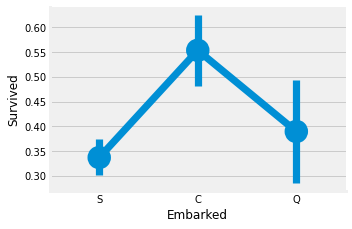

In [45]:
sns.factorplot('Embarked','Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

# gcf : get the current figure

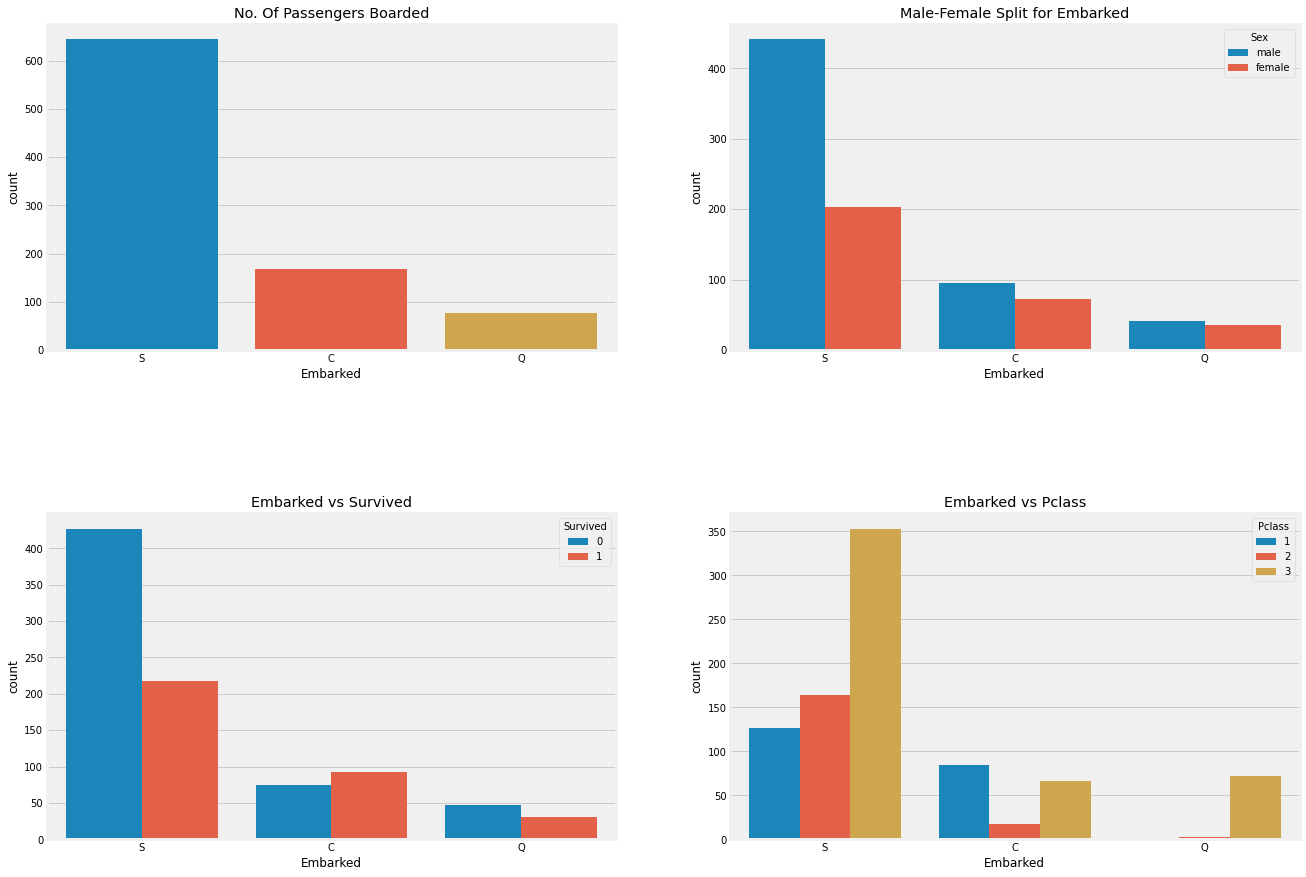

In [46]:
f, ax = plt.subplots(2,2, figsize=(20, 15))

sns.countplot('Embarked', data = data, ax = ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue= 'Sex', data = data, ax = ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue= 'Survived', data = data, ax = ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data = data, ax = ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

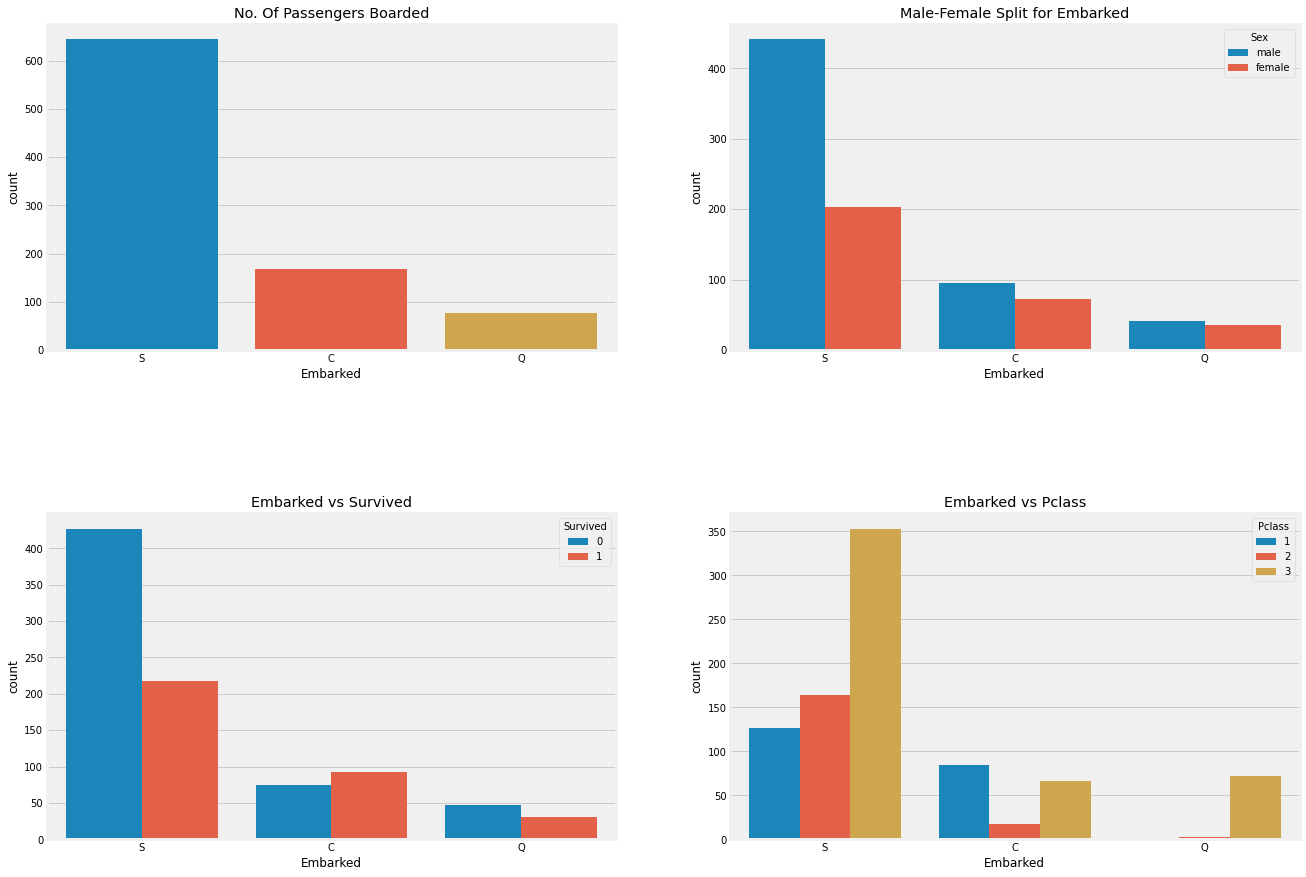

In [47]:
f,ax=plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

>Observations:

* 1)The survival chances are almost 1 for women for Pclass1 and Pclass2 irrespective of the Pclass.

* 2)Port S looks to be very unlucky for Pclass3 Passenegers as the survival rate for both men and women is very low.(Money Matters)

* 3)Port Q looks looks to be unlukiest for Men, as almost all were from Pclass 3.

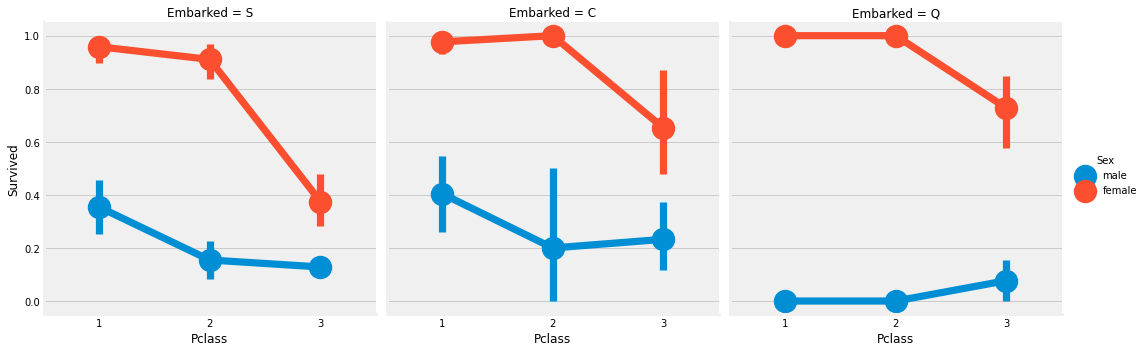

In [48]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

* Filling Embarked NaN

In [49]:
data['Embarked'].fillna('S', inplace=True)

In [50]:
data.Embarked.isnull().any()

False

### SibSip -> Discrete Feature

This feature represents whether a person is alone or with his family members.

* Sibling = brother, sister, stepbrother, stepsister

* Spouse = husband, wife

In [51]:
pd.crosstab([data.SibSp], data.Survived)#.style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


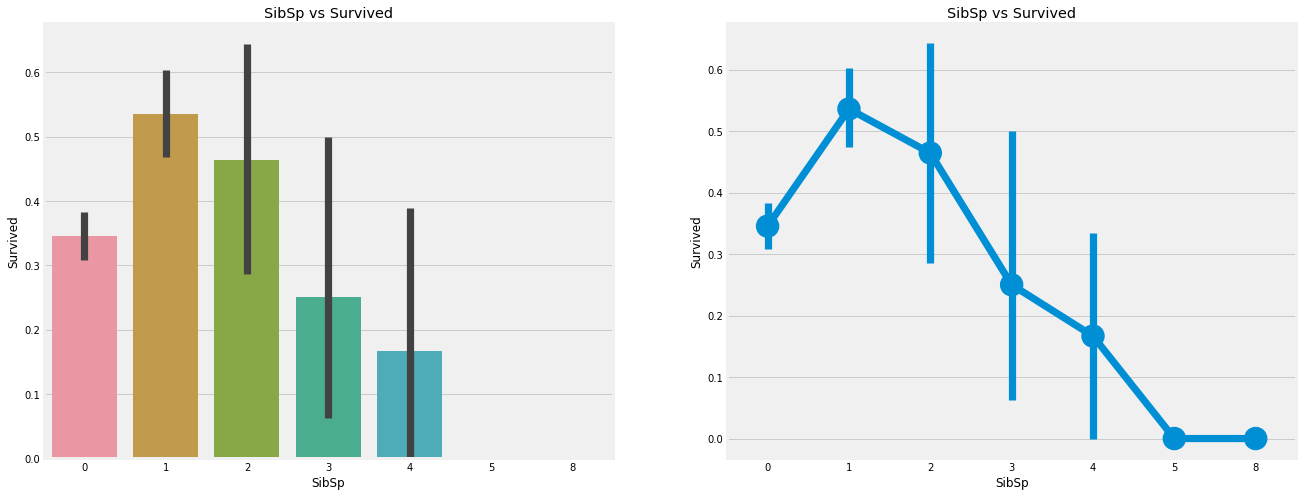

In [52]:
f,ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot('SibSp', 'Survived', data = data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.pointplot('SibSp', 'Survived', data = data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')

plt.close(2)
plt.show()


## plt.close(1)/ plt.close(2)


In [53]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


>Observations:

The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass??

The reason is Pclass. The crosstab shows that Person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

### Parch


In [54]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

# The crosstab again shows that larger families were in Pclass3.

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


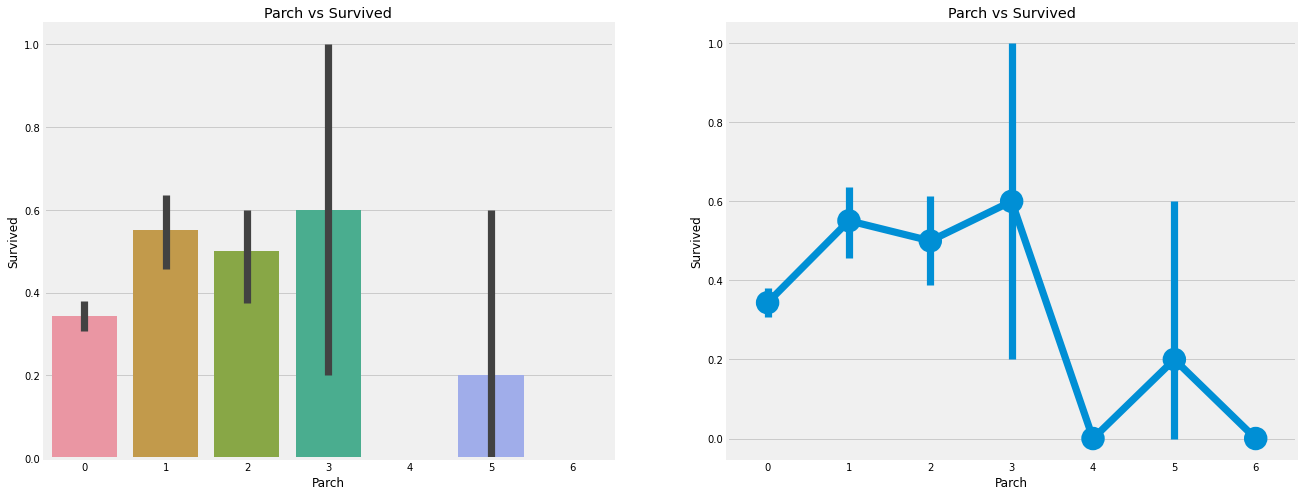

In [55]:
f, ax= plt.subplots(1,2, figsize=(20,8))

sns.barplot('Parch', 'Survived', data = data, ax = ax[0])
ax[0].set_title('Parch vs Survived')

sns.pointplot('Parch', 'Survived', data = data, ax = ax[1])
ax[1].set_title('Parch vs Survived')

plt.close(2)
plt.show()

>Observations:

Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.
> 부모님과 함께 승선한 경우 생존률이 올라간다.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

### Fare -> Continous Feature

In [56]:
print('Highest Fare was :', data['Fare'].max())
print('Lowest Fare was :', data['Fare'].min())
print('Average Fare was :', data['Fare'].mean())

Highest Fare was : 512.3292
Lowest Fare was : 0.0
Average Fare was : 32.204207968574636


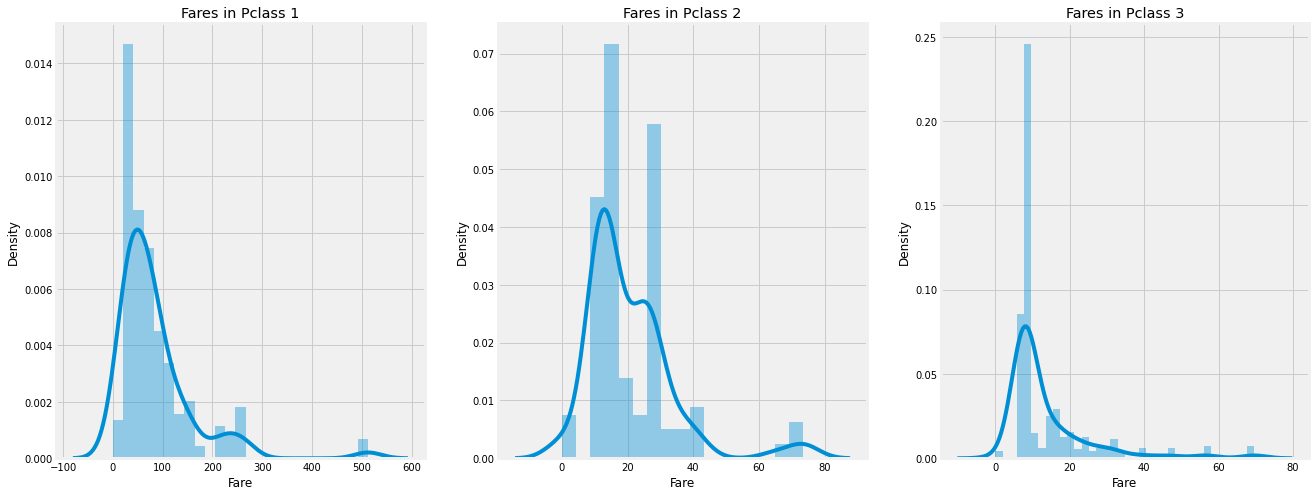

In [57]:
f,ax =plt.subplots(1,3, figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data[data['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data[data['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

* Pclass1: 요금 -100??

There looks to be a large distribution in the fares of Passengers in Pclass1 and this distribution goes on decreasing as the standards reduces. As this is also continous, we can convert into discrete values by using binning.

### Observations in a Nutshell for all features:

Sex: The chance of survival for women is high as compared to men.
> 성별 : 여성 생존률 > 남성 생존률

Pclass:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.
> 클래스별 : 1등석 승객 생존률 > 2등> 3등 (1등석 여성 생존률 거의 100%)


Age: Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.
>연령별 : 5-10세 아동 생존률 가장 높음/ 15-35세 청년 사망률 가장 높음

Embarked: This is a very interesting feature. The chances of survival at C looks to be better than even though the majority of Pclass1 passengers got up at S. Passengers at Q were all from Pclass3.
> 승선지 : C 항구 승선객 생존률 가장 높음

Parch+SibSp: Having 1-2 siblings,spouse on board or 1-3 Parents shows a greater chance of probablity rather than being alone or having a large family travelling with you.
> 동행: 형재자매,배우자 (1-2명) 이거나 부모님(1-3명) 경우 생존률 > 혼자 또는 가족이 많은 경우 생존률



### Correlation Between The Features

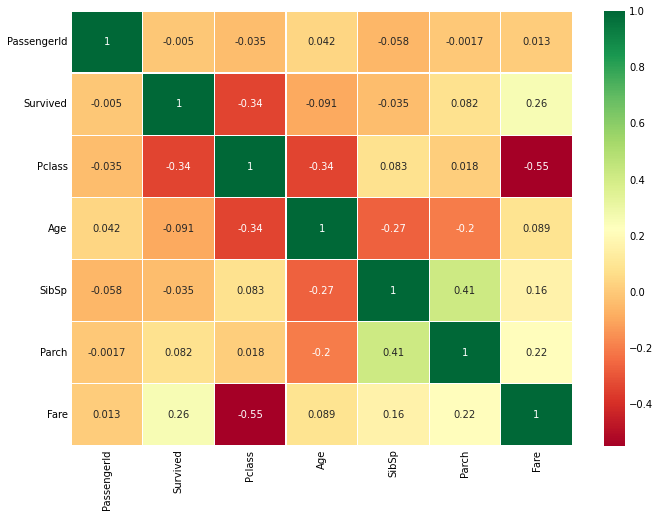

In [58]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# annot = True 수치표시

# Part2: Feature Engineering and Data Cleaning

>Problem With Age Feature:
As I have mentioned earlier that Age is a continous feature, there is a problem with Continous Variables in Machine Learning Models.

We need to convert these continous values into categorical values by either Binning or Normalisation. I will be using binning i.e group a range of ages into a single bin or assign them a single value.
연속적 값을 카테고리 값으로 변환 : 바이닝 or 정규화 (여기서는 바이닝으로 처리 )


### Age_band

In [59]:
data['Age_band']=0
data.loc[data['Age']<=16, 'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']= 1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']= 2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band'] = 4
data.head(2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [60]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


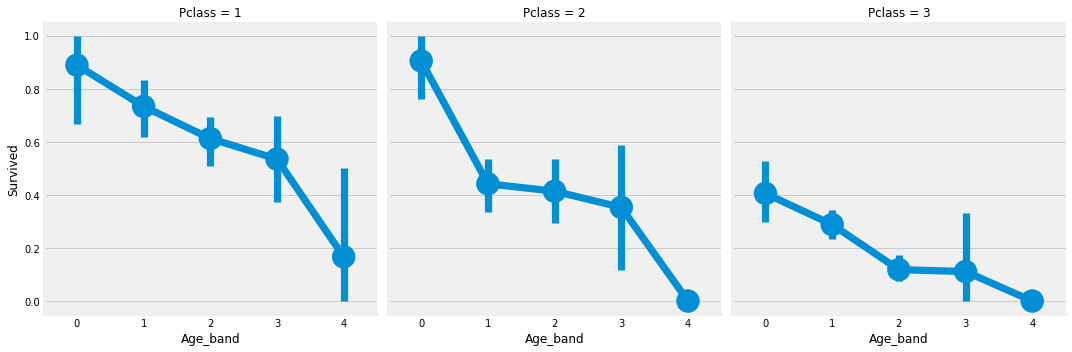

In [61]:
sns.factorplot('Age_band', 'Survived', data= data, col='Pclass')
plt.show()

# factorplot > pointplot : 그래프 하나만 나옴

### Family_Size and Alone

* pointplot() - graph 하나만 나온다.
* plt.close() - 의미를 잘 못찾겠다.

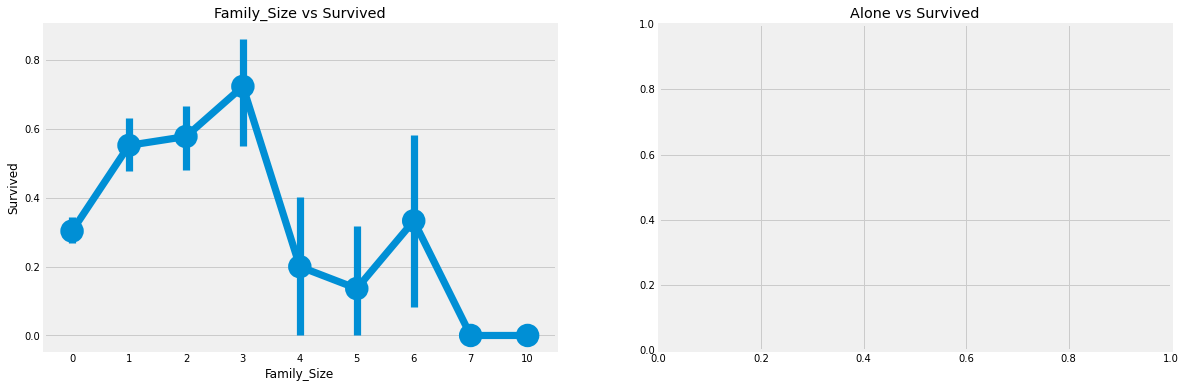

In [62]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0, 'Alone']=1


f, ax = plt.subplots(1,2, figsize=(18,6))

sns.pointplot('Family_Size', 'Survived', data = data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone','Survived', data = data, ax = ax[1])
ax[1].set_title('Alone vs Survived')

plt.close(2)
plt.close(3)
plt.show()

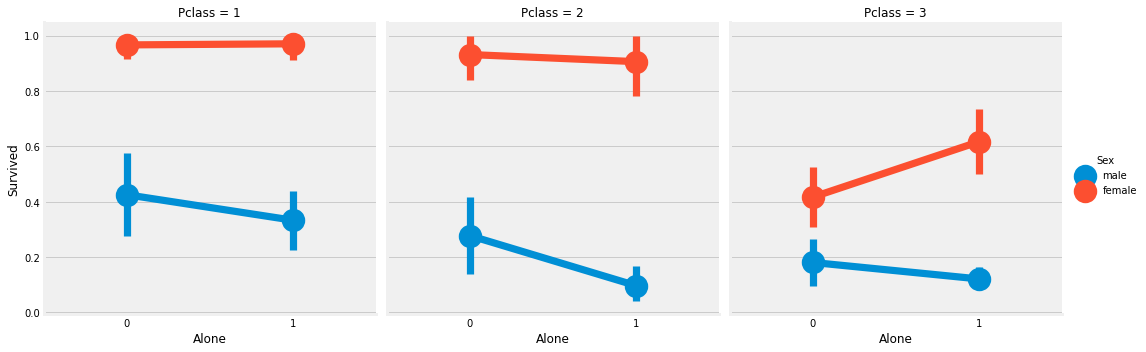

In [63]:
sns.factorplot('Alone', 'Survived', data = data, hue='Sex', col = 'Pclass')
plt.show()

>It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass3 where the chances of females who are alone is high than those with family.

### Fare_Range

> Since fare is also a continous feature, we need to convert it into ordinal value. For this we will use **"pandas.qcut".**

In [64]:
# pandas.qcut : pd.qcut(data[], n) 범위를 4개로 나누어 준다. 

data['Fare_Range']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


>> we can clearly see that as the fare_range increases, the chances of survival increases.



> Now we cannot pass the Fare_Range values as it is. We should convert it into singleton values same as we did in Age_Band

In [65]:
data['Fare_cat']= 0
data.loc[data['Fare']<= 7.91, 'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513), 'Fare_cat']=3

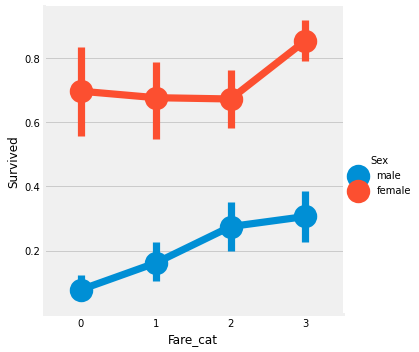

In [66]:
sns.factorplot('Fare_cat', 'Survived', data= data, hue='Sex')
plt.show()

>> as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

### Converting String Values into Numeric

In [67]:
data['Sex'].replace(['male', 'female'],[0,1], inplace= True)
data['Embarked'].replace(['S','C','Q'],[0,1,2], inplace = True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

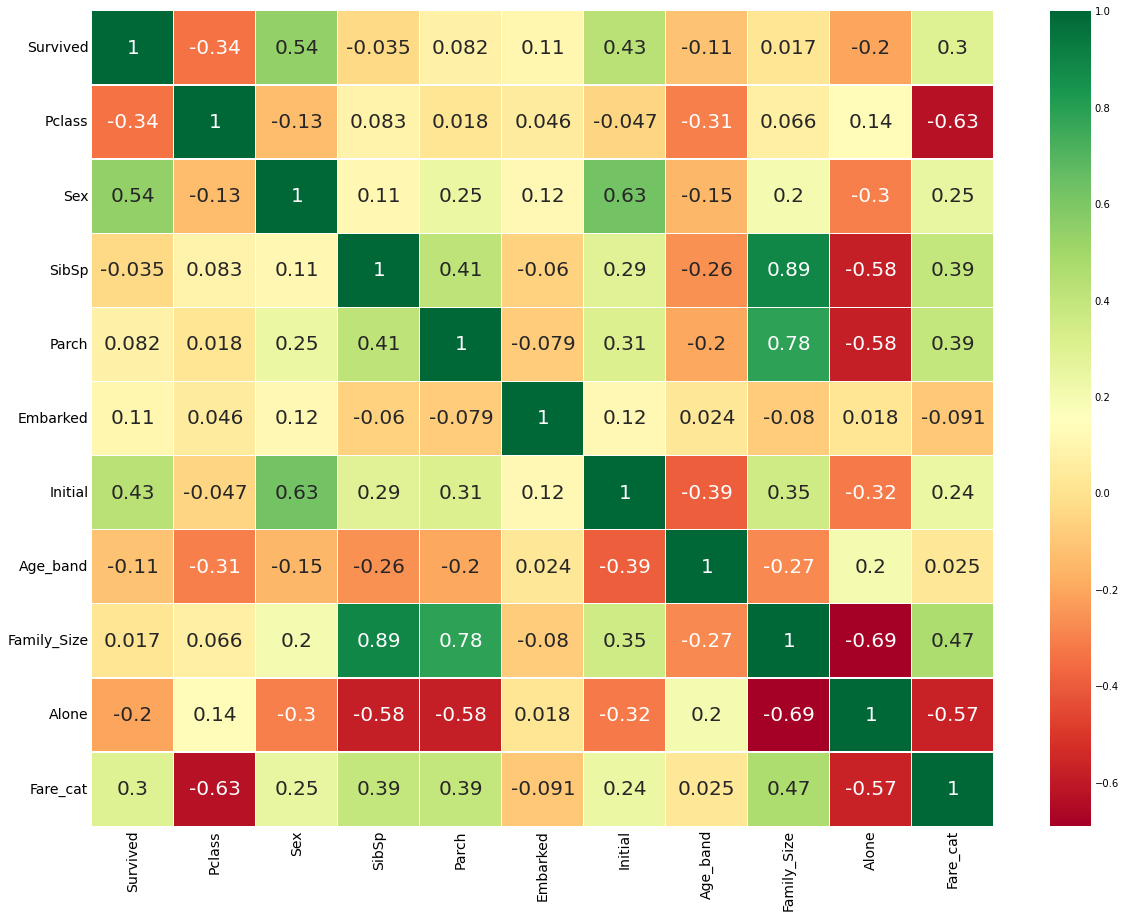

In [68]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# Part3: Predictive Modeling

### Import Library

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics # accuracy measure
from sklearn.metrics import confusion_matrix

In [70]:
train, test= train_test_split(data, test_size=0.3, random_state = 0, stratify = data['Survived'])

train_X= train[train.columns[1:]]
train_Y= train[train.columns[:1]]
test_X= test[test.columns[1:]]
test_Y= test[test.columns[:1]]


X = data[data.columns[1:]]
Y = data['Survived']


#stratify

* Radial Support Vector Machines (rbf-SVM)


Cfloat, default=1.0
Regularization parameter

kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’

degreeint, default=3
Degree of the polynomial kernel function (‘poly’).

gamma{‘scale’, ‘auto’} or float, default=’scale’
Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

In [71]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

#Radial basis function (RBF)

Accuracy for rbf SVM is 0.835820895522388


In [72]:
#Linear Support Vector Machine(linear-SVM)

model= svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2= model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


In [73]:
# Logistic Regression

model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


In [74]:
# Decision Tree

medel = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8134328358208955


In [75]:
# K-Nearest Neighbours(KNN)

model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8134328358208955


* ???

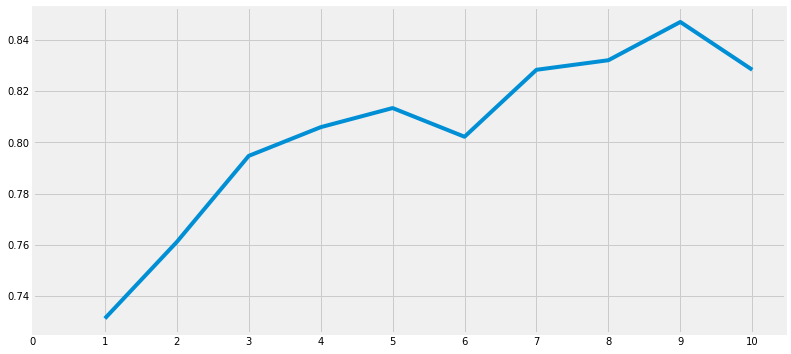

Accuracies for different values of n are: [0.73134328 0.76119403 0.79477612 0.80597015 0.81343284 0.80223881
 0.82835821 0.83208955 0.84701493 0.82835821] with the max value as  0.8470149253731343


In [76]:
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_Y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_Y)))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [77]:
# Gaussian Naive Bayes

model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [78]:
# Random Forests

model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))



#n_estimatorsint, default=100
#The number of trees in the forest.

The accuracy of the Random Forests is 0.8097014925373134


### Cross Validation

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle = True)


xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','KRadial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest' ]
models = [svm.SVC(kernel= 'linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
  model = i 
  cv_result = cross_val_score(model,X,Y, cv = kfold, scoring ="accuracy")
  cv_result = cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)
new_models_dataframe2= pd.DataFrame({'CV Mean' : xyz, 'Std' :std}, index=classifiers)
new_models_dataframe2


# random_state, shuffle=True

,CV Mean,Std
Linear Svm,0.784607,0.057841
KRadial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.804732,0.046567
Naive Bayes,0.795843,0.054861
Random Forest,0.810375,0.043377




                            0         1         2         3         4  \
Linear Svm           0.700000  0.764045  0.752809  0.820225  0.730337   
KRadial Svm          0.744444  0.775281  0.808989  0.853933  0.775281   
Logistic Regression  0.733333  0.775281  0.808989  0.797753  0.752809   
KNN                  0.755556  0.797753  0.775281  0.808989  0.786517   
Decision Tree        0.788889  0.842697  0.741573  0.797753  0.797753   
Naive Bayes          0.700000  0.786517  0.752809  0.786517  0.764045   
Random Forest        0.766667  0.842697  0.752809  0.775281  0.797753   

                            5         6         7         8         9  
Linear Svm           0.764045  0.876404  0.752809  0.797753  0.887640  
KRadial Svm          0.797753  0.921348  0.831461  0.853933  0.921348  
Logistic Regression  0.775281  0.853933  0.797753  0.831461  0.865169  
KNN                  0.797753  0.865169  0.820225  0.797753  0.876404  
Decision Tree        0.752809  0.842697  0.786517  0.

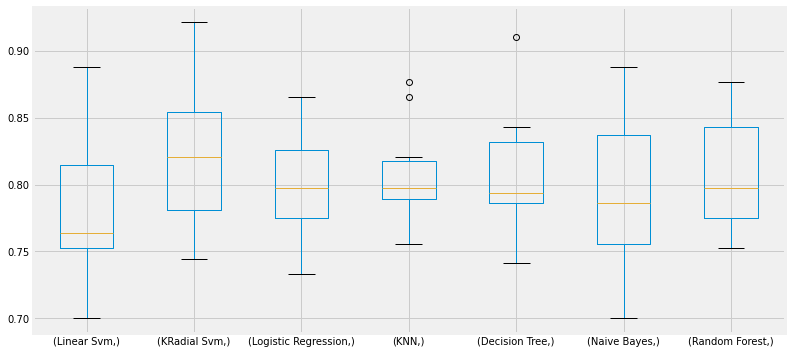

In [80]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index =[classifiers])
box.T.boxplot()
print('\n')
print(box)
print('\n')
print(box.T)

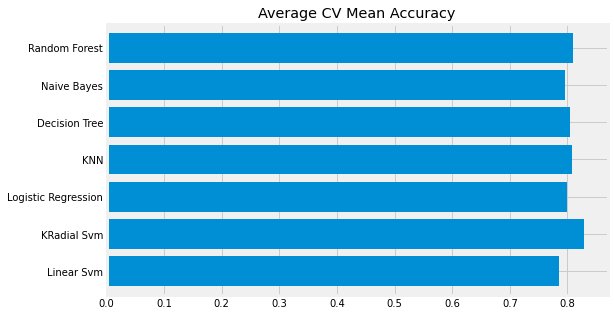

In [81]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig= plt.gcf()
fig.set_size_inches(8,5)
plt.show()

### Confusion Matrix

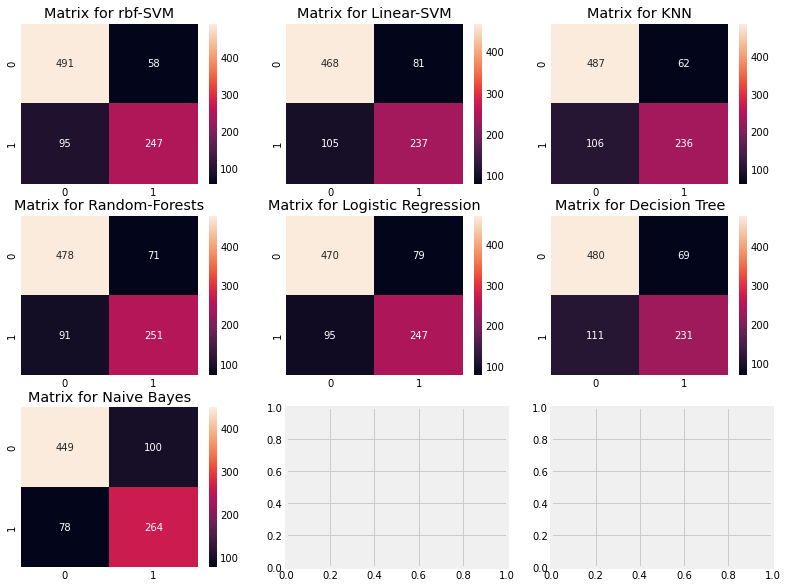

In [82]:
f,ax=plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()